36


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\matplotlib\text.py:753: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\matplotlib\text.py:754: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\matplotlib\text.py:894: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\matplotlib\text.py:895: FutureWarning: Calling float on a single element Series is deprecat

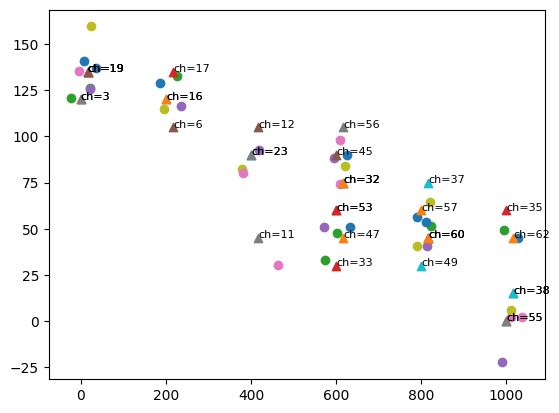

In [ ]:
import os
os.chdir(r"Q:/sachuriga/Sachuriga_Python/quattrocolo-nwb4fp/src")
from pynwb import NWBHDF5IO
from pathlib import Path
import importlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

file_path = r"Q:\sachuriga\Sachuriga_Python/quattrocolo-nwb4fp/ASSY-236-F.prb"
# Read the file and parse the dictionary
local_vars = {'np': np}
with open(file_path, 'r') as file:
    exec(file.read(), local_vars)  # Execute the file content with NumPy in scope
channel_groups = local_vars.get('channel_groups')
if channel_groups is None:
    raise ValueError(f"'channel_groups' not found in {file_path}")

# Assuming channel_groups is loaded from Step 1
data = []
for group_id, group_data in channel_groups.items():
    channels = group_data['channels']
    geometry = group_data['geometry']
    for channel in channels:
        x, y = geometry[channel]
        data.append({
            'group_id': group_id,
            'channel_id': channel,
            'x': x,
            'y': y
        })

# Create a DataFrame
df = pd.DataFrame(data)

nwbpath=r"S:\Sachuriga\nwb\test4neo/63383_2024-07-10_15-37-51_A_phy_k_manual.nwb"
with NWBHDF5IO(Path(nwbpath), "r") as io:
    from nwb4fp.data.helpers import unit_location_ch
    from sklearn.preprocessing import MinMaxScaler
    nwb = io.read()
    scaler = MinMaxScaler(feature_range=(0, 1))
    time = nwb.processing['Behavioral data']['Mid_brain_cords']['Mid_brain_cords'].timestamps[:]
    xy = nwb.processing['Behavioral data']['Mid_brain_cords']['Mid_brain_cords'].data[:]

    pos = np.column_stack((
        time,
        scaler.fit_transform(xy[:, 0].reshape(-1, 1)).flatten(),
        scaler.fit_transform(xy[:, 1].reshape(-1, 1)).flatten()
    ))
    lfp = nwb.processing['lfp_raw']['LFP']['lfp_raw'].data[:]
    lfp_times = nwb.processing['Behavioral data']['Head(snout2neck)_Direction']['lfp_times'].data[:]
    print(len(nwb.units))
    for i in range(len(nwb.units)):
        unit_x = nwb.units[i]['x'].values[0]
        unit_y = nwb.units[i]['y'].values[0]
        plt.scatter(unit_x, unit_y, marker='o')  # Using scatter instead of plot to show dots
        ch = unit_location_ch(file_path=r"Q:\sachuriga\Sachuriga_Python/quattrocolo-nwb4fp/ASSY-236-F.prb",x=unit_x,y=unit_y)
        plt.scatter(df[df['channel_id']==ch]['x'], df[df['channel_id']==ch]['y'], marker='^')
        plt.text(df[df['channel_id']==ch]['x'], df[df['channel_id']==ch]['y'], fr"ch={ch}", fontsize=8, color='black')

plt.show()


In [ ]:
import os
os.chdir(r"Q:/sachuriga/Sachuriga_Python/quattrocolo-nwb4fp/src")
from pynwb import NWBHDF5IO
from pathlib import Path
import importlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

file_path = r"Q:\sachuriga\Sachuriga_Python/quattrocolo-nwb4fp/ASSY-236-F.prb"
# Read the file and parse the dictionary
local_vars = {'np': np}
with open(file_path, 'r') as file:
    exec(file.read(), local_vars)  # Execute the file content with NumPy in scope
channel_groups = local_vars.get('channel_groups')
if channel_groups is None:
    raise ValueError(f"'channel_groups' not found in {file_path}")

# Assuming channel_groups is loaded from Step 1
data = []
for group_id, group_data in channel_groups.items():
    channels = group_data['channels']
    geometry = group_data['geometry']
    for channel in channels:
        x, y = geometry[channel]
        data.append({
            'group_id': group_id,
            'channel_id': channel,
            'x': x,
            'y': y
        })

# Create a DataFrame
df = pd.DataFrame(data)

nwbpath=r"S:\Sachuriga\nwb\test4neo/63383_2024-07-10_15-37-51_A_phy_k_manual.nwb"
with NWBHDF5IO(Path(nwbpath), "r") as io:
    from nwb4fp.data.helpers import unit_location_ch
    from sklearn.preprocessing import MinMaxScaler
    nwb = io.read()
    scaler = MinMaxScaler(feature_range=(0, 1))
    time = nwb.processing['Behavioral data']['Mid_brain_cords']['Mid_brain_cords'].timestamps[:]
    xy = nwb.processing['Behavioral data']['Mid_brain_cords']['Mid_brain_cords'].data[:]
    pos = np.column_stack((
        time,
        scaler.fit_transform(xy[:, 0].reshape(-1, 1)).flatten(),
        scaler.fit_transform(xy[:, 1].reshape(-1, 1)).flatten()
    ))
    lfp = nwb.processing['lfp_raw']['LFP']['lfp_raw'].data[:]
    lfp_times = nwb.processing['Behavioral data']['Head(snout2neck)_Direction']['lfp_times'].data[:]
    print(len(nwb.units))
    for i in range(len(nwb.units)):
        unit_x = nwb.units[i]['x'].values[0]
        unit_y = nwb.units[i]['y'].values[0]
        ch = unit_location_ch(file_path=r"Q:\sachuriga\Sachuriga_Python/quattrocolo-nwb4fp/ASSY-236-F.prb",x=unit_x,y=unit_y)
        lfp_u = lfp[:,ch]
        lfp_unit =  np.column_stack(lfp_times.T,lfp_u.T)


plt.show()


36


TypeError: column_stack() takes 1 positional argument but 2 were given

In [8]:
np.column_stack((lfp_times,lfp_u))


array([[  64.02163333,  -41.14499664],
       [  64.02263333,  -24.76499939],
       [  64.02363333,   20.67000008],
       ...,
       [1261.4372    ,  149.36999512],
       [1261.4382    ,  130.84500122],
       [1261.4392    ,   92.625     ]])

In [ ]:
def unit_location_ch(file_path:str=r"Q:\sachuriga\Sachuriga_Python/quattrocolo-nwb4fp/ASSY-236-F.prb", x: float = 0.0, y: float = 0.0):

    import pandas as pd
    x_input=x
    y_input=y

    # Read the file and parse the dictionary
    local_vars = {'np': np}
    with open(file_path, 'r') as file:
        exec(file.read(), local_vars)  # Execute the file content with NumPy in scope
    channel_groups = local_vars.get('channel_groups')
    if channel_groups is None:
        raise ValueError(f"'channel_groups' not found in {file_path}")

    # Assuming channel_groups is loaded from Step 1
    data = []
    for group_id, group_data in channel_groups.items():
        channels = group_data['channels']
        geometry = group_data['geometry']
        for channel in channels:
            x, y = geometry[channel]
            data.append({
                'group_id': group_id,
                'channel_id': channel,
                'x': x,
                'y': y
            })

    # Create a DataFrame
    df = pd.DataFrame(data)
    # Sort by group_id and channel_id for clarity (optional)
    dataframe = df.sort_values(by=['group_id', 'channel_id']).reset_index(drop=True)

    # Function to find the nearest channel_id given x and y coordinates
        # Calculate Euclidean distance from input (x, y) to all points in the DataFrame
    distances = np.sqrt((dataframe['x'] - x_input)**2 + (dataframe['y'] - y_input)**2)
    nearest_idx = distances.idxmin()

    # Return the channel_id at that index
    channel_id=dataframe.loc[nearest_idx, 'channel_id']

    return channel_id